Ця практична має на меті показати основні класи та методи бібліотеки sklearn для роботи з нейронними мережами.

In [13]:
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [14]:
def plot_data(X, y):
    ax = plt.gca()
    ax.scatter(X[:,0], X[:,1], c=(y == 1), cmap=cm_bright)
    

In [15]:
def plot_surface(est, x_1, x_2, ax=None, threshold=0.5, contourf=False):
    xx1, xx2 = np.meshgrid(np.linspace(x_1.min(), x_1.max(), 100), 
                           np.linspace(x_2.min(), x_2.max(), 100))

    X_pred = np.c_[xx1.ravel(), xx2.ravel()]
    pred = est.predict_proba(X_pred)[:, 1]
    Z = pred.reshape((100, 100))
    if ax is None:
        ax = plt.gca()
    ax.contour(xx1, xx2, Z, levels=[threshold], colors='black')
    ax.set_xlim((x_1.min(), x_1.max()))
    ax.set_ylim((x_2.min(), x_2.max()))
    

make_classification використовується для генерування тестових даних. За допомогою різних варіантів вхідних параметрі можна генерувати датасети, які можна буде лінійно розділити і такі, які не розділяються (складні області, шум).

In [16]:
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

В реальних задачах обов"язково здійснюйте розділення даних на тренувальні та тестові!

In [18]:
X_train.shape

(160, 2)

In [19]:
X_test.shape

(40, 2)

In [71]:
cls = MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50, 100,))

Спробуйте різні параметри для make_classification та MLPClassifier. Зокрема, генеруйте датасети з більшими кількостями характеристик і складнішим виглядом. Зауважте, що тоді побудова графіків буде складнішою (поточні методи для цього не працюватимуть).

In [72]:
cls = cls.fit(X_train, y_train)

In [73]:
y_train_pred = cls.predict(X_train)

In [74]:
accuracy_score(y_train_pred, y_train)

0.5212765957446809

In [75]:
y_test_pred = cls.predict(X_test)
accuracy_score(y_test_pred, y_test)

0.375

TypeError: '(slice(None, None, None), 0)' is an invalid key

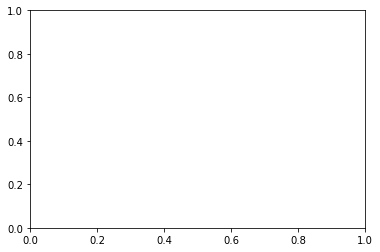

In [76]:
plot_data(X_test, y_test)
plot_surface(cls, X_train[:,0], X_train[:,1])
plt.show()

Скільки шарів та нейронів в них має дана мережа? Яка швидкість навчання? Які функції активації використовуються та скільки ітерацій?

In [77]:
cls

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [78]:
cls.n_layers_

5

In [79]:
cls.n_outputs_

1

Спробуємо на відомому нам датасеті:

In [80]:
dataset = pd.read_csv('sats.csv')

In [81]:
X, y = dataset[['exam1', 'exam2']], dataset['submitted']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(80, 2) (20, 2)


In [121]:
cls = MLPClassifier(activation='relu', max_iter=1000)

In [122]:
cls = cls.fit(X_train, y_train)

In [123]:
cls.n_iter_

884

In [124]:
y_train_pred = cls.predict(X_train)
accuracy_score(y_train_pred, y_train)

0.8829787234042553

In [125]:
y_test_pred = cls.predict(X_test)
accuracy_score(y_test_pred, y_test)

0.75

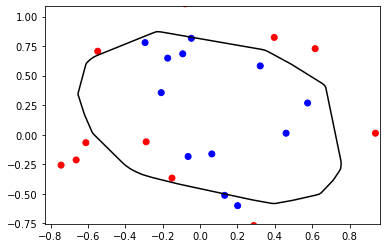

In [107]:
plot_data(X_test.values, y_test)
plot_surface(cls, X_train.values[:,0], X_train.values[:,1])
plt.show()

А тепер на складнішому - він не так просто розділяється границею прийняття рішення. Ми це бачили в логістичній регресії.

In [88]:
dataset = pd.read_csv('tests.csv')
X, y = dataset[['test1', 'test2']], dataset['passed']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(94, 2) (24, 2)


In [90]:
cls = MLPClassifier(activation='relu', max_iter=10000)

In [91]:
cls = cls.fit(X_train, y_train)

In [92]:
y_train_pred = cls.predict(X_train)
accuracy_score(y_train_pred, y_train)

0.8723404255319149

In [93]:
y_test_pred = cls.predict(X_test)
accuracy_score(y_test_pred, y_test)

0.75

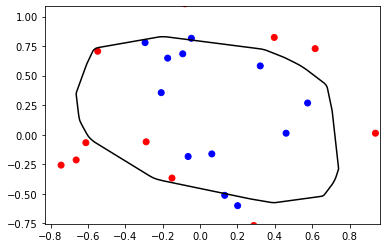

In [94]:
plot_data(X_test.values, y_test)
plot_surface(cls, X_train.values[:,0], X_train.values[:,1])
plt.show()